In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Import Emma image
emma = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

(256,)


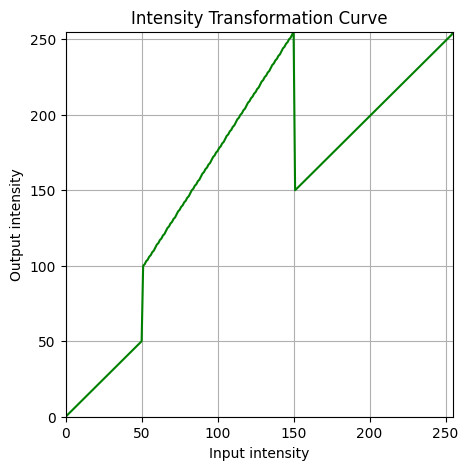

In [55]:
# Define piecewise transformation function
t1 = np.linspace(0, 50, num=51).astype('uint8')
t2 = np.linspace(100, 255, num=100).astype('uint8')
t3 = np.linspace(150, 255, num=105).astype('uint8')

# Concatenate all segments to create the transformation array
t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(t.shape)

# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(t, color='green')
plt.title("Intensity Transformation Curve")
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


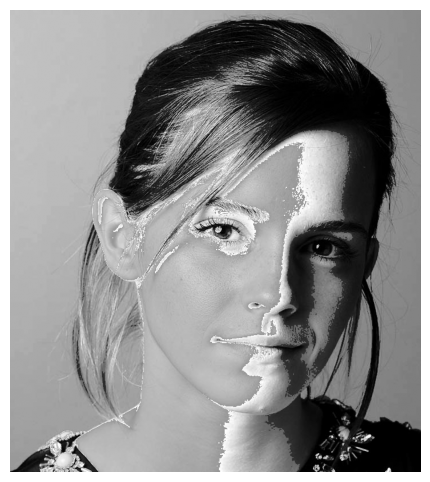

In [56]:
g = t[emma]
 
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

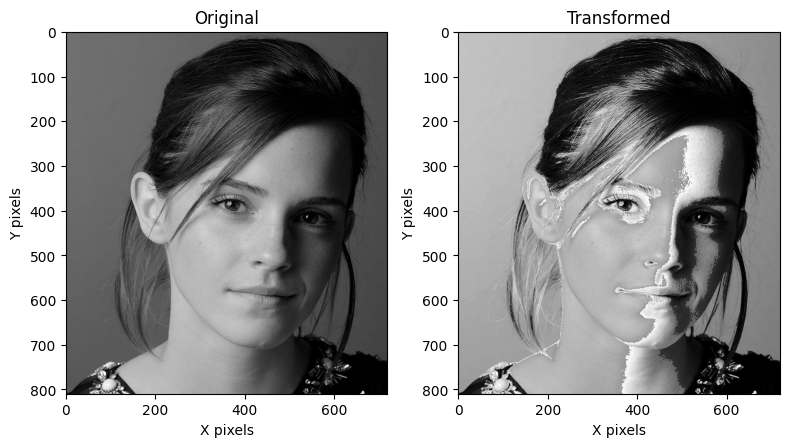

In [57]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

# Original image with scale
ax[0].imshow(emma, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].set_xlabel('X pixels')
ax[0].set_ylabel('Y pixels')

# Transformed image with scale
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].set_xlabel('X pixels')
ax[1].set_ylabel('Y pixels')

plt.tight_layout()
plt.show()


## Question 2

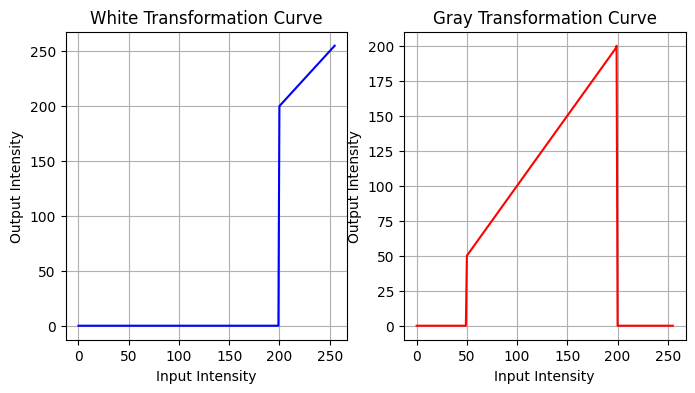

In [58]:
# Creating transformations

white_t = np.linspace(200, 255, 56).astype(np.uint8)
white_t = np.concatenate((np.zeros(200, dtype=np.uint8), white_t), axis=0).astype(np.uint8)

gray_t = np.linspace(50, 200, 150).astype(np.uint8)
gray_t = np.concatenate((np.zeros(50, dtype=np.uint8),gray_t, np.zeros(56, dtype=np.uint8)), axis=0).astype(np.uint8)

# plot the transformation
x = np.arange(256)

# Plotting white and grey transformations curves
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, white_t, color='blue')
ax[0].set_title("White Transformation Curve")
ax[0].set_xlabel("Input Intensity")
ax[0].set_ylabel("Output Intensity")
ax[0].grid(True)

ax[1].plot(x, gray_t, color='red')
ax[1].set_title("Gray Transformation Curve")
ax[1].set_xlabel("Input Intensity")
ax[1].set_ylabel("Output Intensity")
ax[1].grid(True)

plt.show()

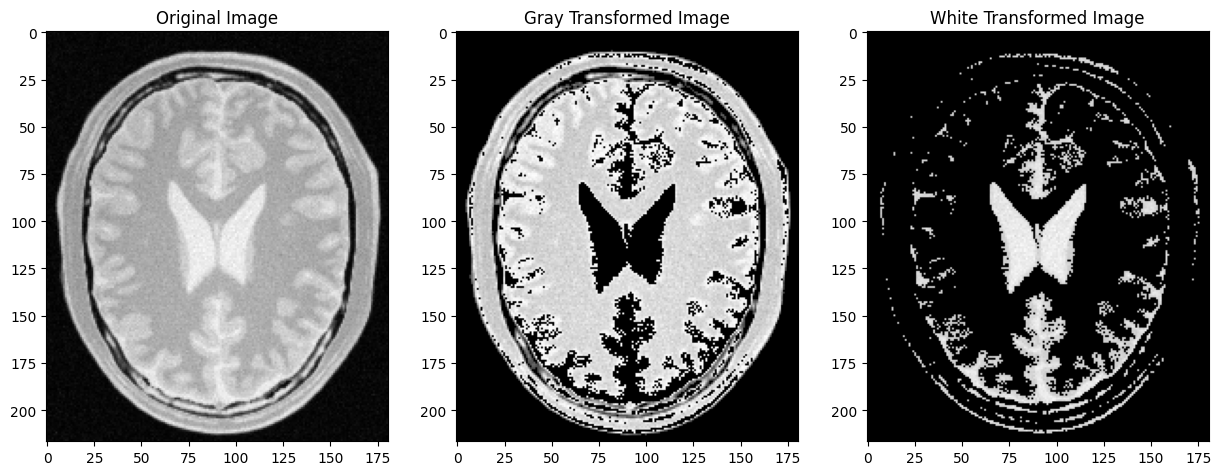

In [34]:
img2 = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

gray_transformed = cv.LUT(img2, gray_t)
white_transformed = cv.LUT(img2, white_t)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gray_transformed, cmap='gray')
ax[1].set_title('Gray Transformed Image')
ax[2].imshow(white_transformed, cmap='gray')
ax[2].set_title('White Transformed Image')
plt.show()

## Question 3


In [59]:
# Import Emma image
imq3_bgr = cv.imread('a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

In [36]:
# Split the image in to L*a*b* color space
L,a,b = cv.split(imq3_lab)

# Define and apply gamma transformation
gamma = 0.7
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)]).astype('uint8')
L_modified = cv.LUT(L, t)

# Merge the channels
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)


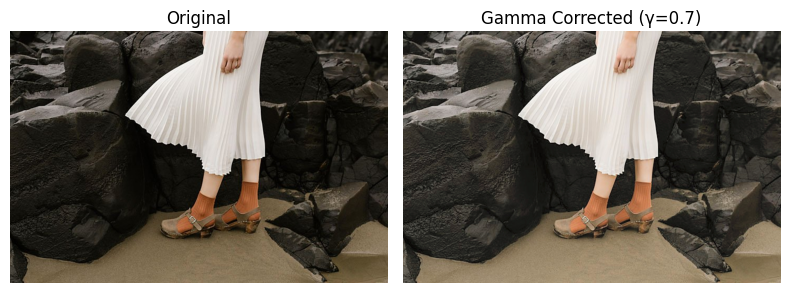

In [37]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot the first image
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

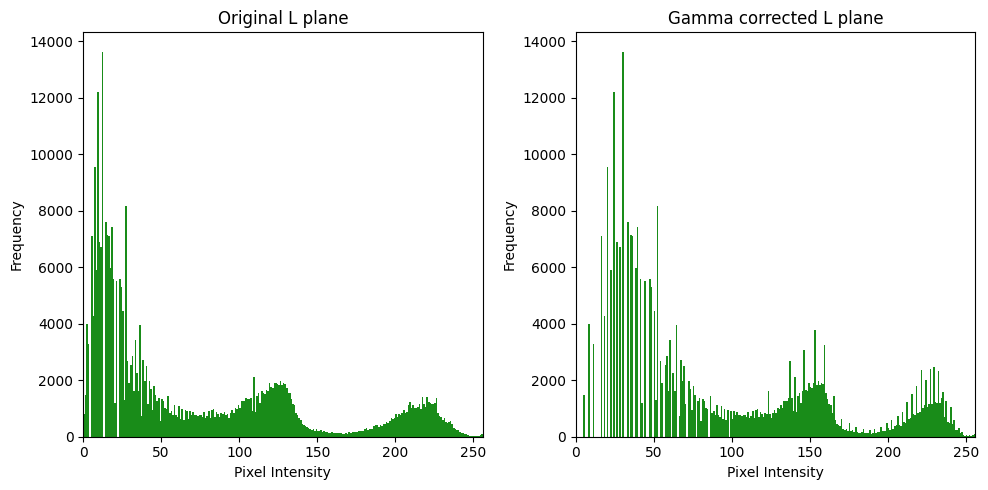

In [38]:
# Compute the histograms for both images
hist1 = cv.calcHist([L], [0], None, [256], [0, 256])
hist2 = cv.calcHist([L_modified], [0], None, [256], [0, 256])

L_flat = L.flatten()
L_modified_flat = L_modified.flatten()

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(L_flat, bins=256, range=(0, 256), color='green', alpha=0.9)
plt.title('Original L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(L_modified_flat, bins=256, range=(0, 256), color='green', alpha=0.9)
plt.title('Gamma corrected L plane')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 4

In [39]:
# Vibrance Transformation function

a = 0.5    # Assume
sigma = 70 # Given
vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

    

part (a)

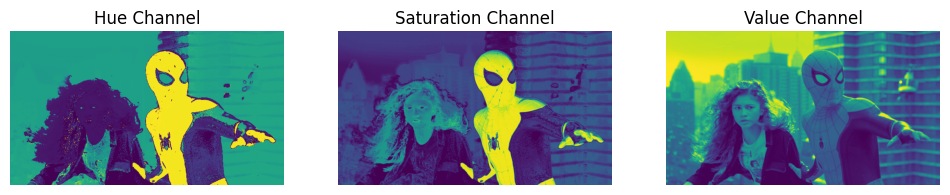

In [40]:
img4 = cv.imread("a1images/spider.png", cv.IMREAD_COLOR_BGR)

img4_rgb = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
h, s, v = cv.split(cv.cvtColor(img4, cv.COLOR_BGR2HSV))

fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(h)
ax[0].set_title("Hue Channel")
ax[0].axis("off")
ax[1].imshow(s)
ax[1].set_title("Saturation Channel")
ax[1].axis("off")
ax[2].imshow(v)
ax[2].set_title("Value Channel")
ax[2].axis("off")

plt.show()




part (b)

In [41]:
sat_trans = cv.LUT(s, vib_t)

part (c)

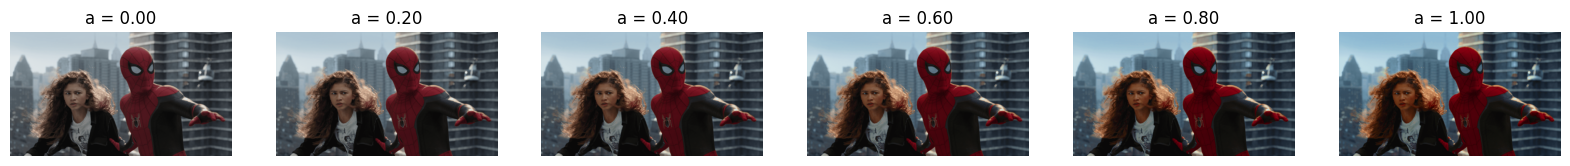

In [42]:
a_values = np.linspace(0, 1, 6)
fig, ax = plt.subplots(1, len(a_values),figsize=(20, 20))

for i, a in enumerate(a_values):
    vib_t = np.array([min((x + (a * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)
    sat_trans = cv.LUT(s, vib_t)
    img = cv.merge([h, sat_trans, v])
    img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
    ax[i].imshow(img)
    ax[i].set_title(f'a = {a:.2f}')
    ax[i].axis('off')
plt.show()

part (d)

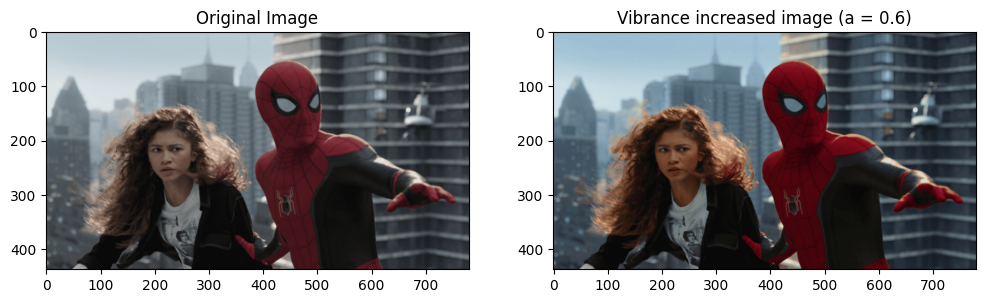

In [43]:
# suitable a value = 0.6
vib_t_final = np.array([min((x + (0.6 * 128 * np.exp(-(((x - 128) ** 2) / (2 * (sigma ** 2)))))), 255) for x in range(256)]).astype(np.uint8)

sat_trans_final = cv.LUT(s, vib_t_final)
img_final = cv.merge([h, sat_trans_final, v])
img_final = cv.cvtColor(img_final, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img4_rgb)
ax[0].set_title("Original Image")
ax[1].imshow(img_final)
ax[1].set_title("Vibrance increased image (a = 0.6)")

plt.show()

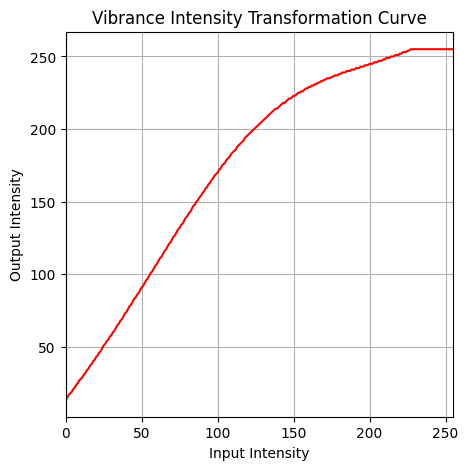

In [44]:
x = np.arange(256)

fig = plt.figure(figsize=(5, 5))
plt.plot(x, vib_t_final, color='red')
plt.title("Vibrance Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

## Question 5

In [45]:
# Import Shells image
shells = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert shells is not None

In [46]:
def histogram_equalization(f):
    # Get image details
    L = 256
    M, N = f.shape

    # Get histogram
    hist = cv.calcHist([f], [0], None, [L], [0, L])
    cdf = hist.cumsum()

    # Define transformation
    t = np.array([(L-1)/(M*N)*cdf[k] for k in range(256)]).astype("uint8")

    return t[f]


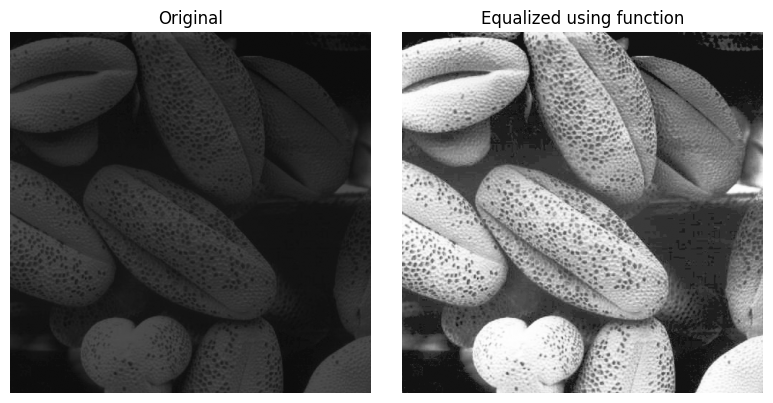

In [47]:
# Do histrogram equalization
equalized = histogram_equalization(shells)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(shells, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()

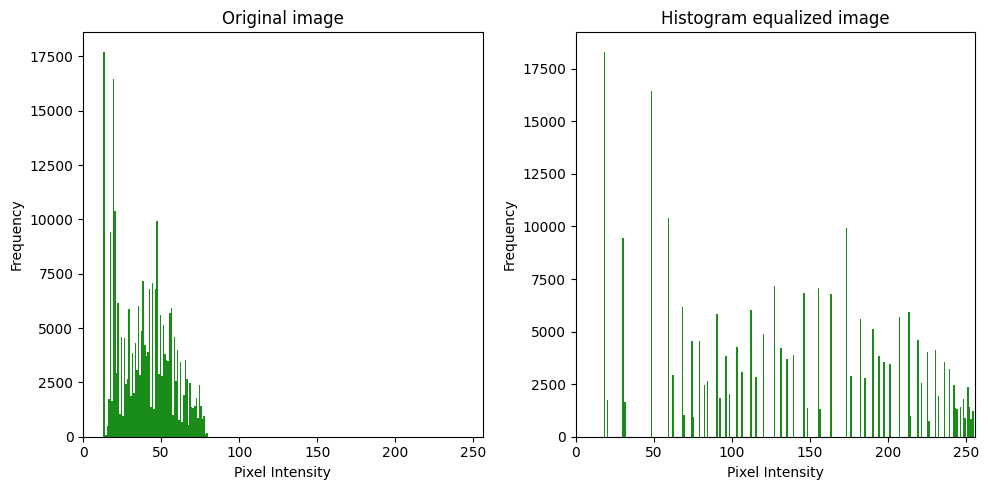

In [48]:
# Compute the histograms for both images
hist1 = cv.calcHist([shells], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

# Create a figure with two subplots
plt.figure(figsize=(10, 5))

shells_flat = shells.flatten()
equalized_flat = equalized.flatten()

# First subplot: Histogram of the first image
plt.subplot(1, 2, 1)
plt.hist(shells_flat, bins=256, range=(0, 256), color='green', alpha=0.9)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Second subplot: Histogram of the second image
plt.subplot(1, 2, 2)
plt.hist(equalized_flat, bins=256, range=(0, 256), color='green', alpha=0.9)
plt.title('Histogram equalized image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Display the plots side by side
plt.tight_layout()  # Adjusts the spacing between subplots for a neat layout
plt.show()

## Question 6

part (a)

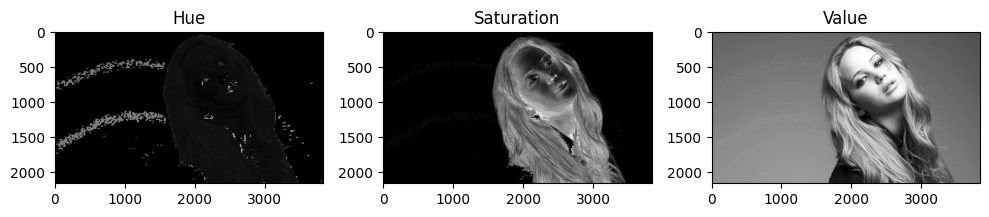

In [89]:
img6 = cv.imread("a1images/jeniffer.jpg", cv.IMREAD_COLOR)
img6_rgb = cv.cvtColor(img6, cv.COLOR_BGR2RGB)

H, S, V = cv.split(cv.cvtColor(img6, cv.COLOR_BGR2HSV))

fig, ax = plt.subplots(1, 3, figsize=(10,10))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Hue")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Saturation")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title("Value")

plt.tight_layout()
plt.show()

part (b)

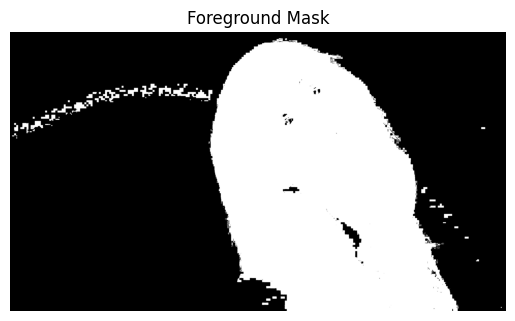

In [90]:
# Apply threshold in Saturation plane
_, foreground_mask = cv.threshold(S, 10, 255, cv.THRESH_BINARY)

plt.imshow(foreground_mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis("off")
plt.show()

part (c)

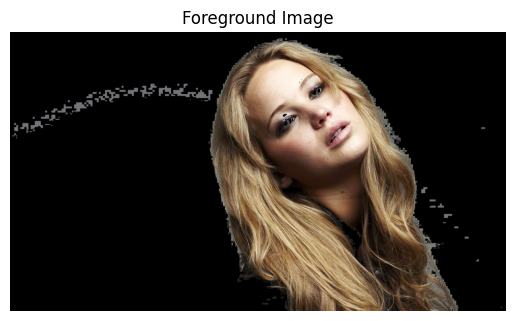

(2160, 3840, 3) uint8


In [91]:
img6_fg = cv.bitwise_and(img6,img6,mask = foreground_mask)

plt.imshow(cv.cvtColor(img6_fg, cv.COLOR_BGR2RGB))
plt.title("Foreground Image")
plt.axis("off")
plt.show()

print(img6_fg.shape, img6_fg.dtype)

In [92]:
# Using Value channel of foreground image for histogram equalization

fg_hsv = cv.cvtColor(img6_fg, cv.COLOR_BGR2HSV)
fg_h, fg_s, fg_v = cv.split(fg_hsv)

In [93]:
L = 2 ** 8
fg_v_hist = cv.calcHist([fg_v], [0], None, [L], [0, L])


part(d)


In [94]:
csum = np.cumsum(fg_v_hist)
csum[-1]

8294400.0

In [95]:
(M, N) = img6_fg.shape[:2]

hist_t = np.array([(L - 1) / (M * N) * csum[j] for j in range(256)]).astype(np.uint8)

fg_v_eq = cv.LUT(fg_v, hist_t)

print(M*N)

8294400


part (f)

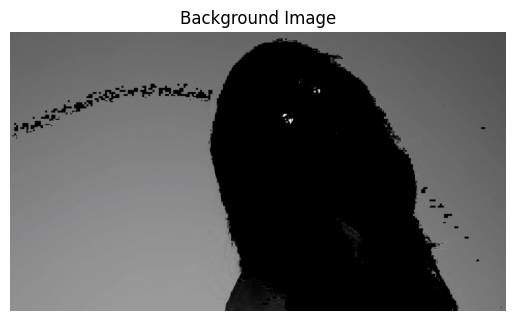

In [96]:
background_mask = cv.bitwise_not(foreground_mask)

img6_bg = cv.bitwise_and(img6, img6, mask=background_mask)

plt.imshow(cv.cvtColor(img6_bg, cv.COLOR_BGR2RGB))
plt.title("Background Image")
plt.axis("off")
plt.show()


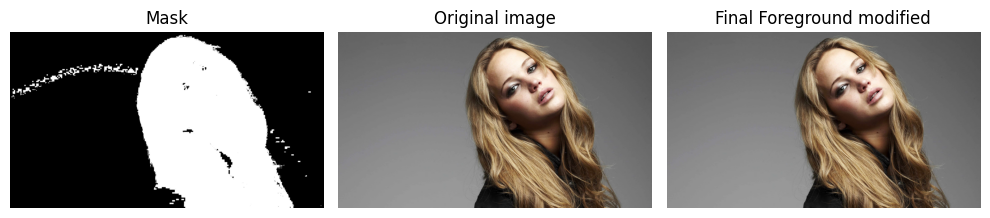

In [97]:
img6_fg_hsv = cv.merge((fg_h, fg_s, fg_v_eq))
img6_fg_rgb = cv.cvtColor(img6_fg_hsv, cv.COLOR_HSV2RGB)
img6_final = cv.add(cv.cvtColor(img6_bg, cv.COLOR_BGR2RGB), cv.cvtColor(img6_fg, cv.COLOR_BGR2RGB))

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(foreground_mask, cmap='gray')
ax[0].set_title("Mask")
ax[0].axis("off")

ax[1].imshow(img6_rgb)
ax[1].set_title("Original image")
ax[1].axis("off")

ax[2].imshow(img6_final)
ax[2].set_title("Final Foreground modified")
ax[2].axis("off")

plt.tight_layout()
plt.show()

## Question 7

In [61]:
# Import Einstein image
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None

In [62]:
# Define the Sobel-X filter
sobel_x = np.array([[1, 0, -1], 
                    [2, 0, -2], 
                    [1, 0, -1]])

# Define the Sobel-Y filter
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

print("Sobel X filter:")
print(sobel_x)

print("\nSobel Y filter:")
print(sobel_y)

Sobel X filter:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sobel Y filter:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [63]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(einstein, cv.CV_64F, sobel_y)

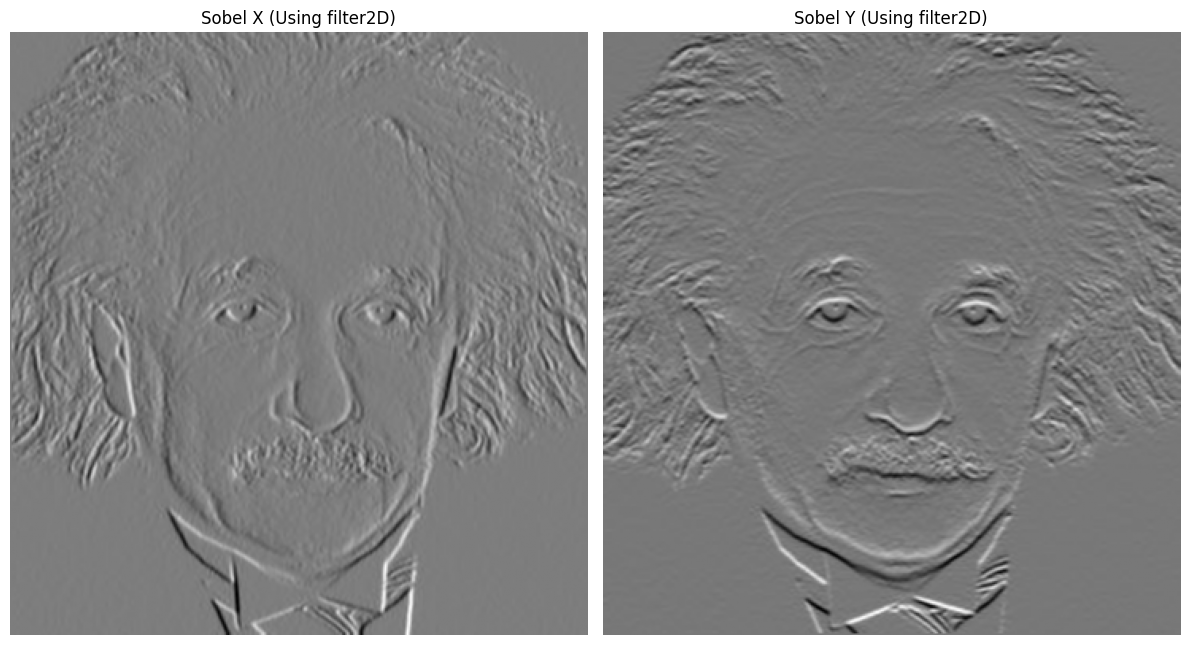

In [64]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [65]:
def apply_filter(image, filter):
    [rows, columns] = np.shape(image) # Get rows and columns of the image
    filtered_image = np.zeros(shape=(rows, columns)) # Create empty image
    
    for i in range(rows - 2):
        for j in range(columns - 2): # Process 2D convolution
            value = np.sum(np.multiply(filter, image[i:i + 3, j:j + 3])) 
            filtered_image[i + 1, j + 1] = value
    
    return filtered_image

In [66]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = apply_filter(einstein, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = apply_filter(einstein, sobel_y)

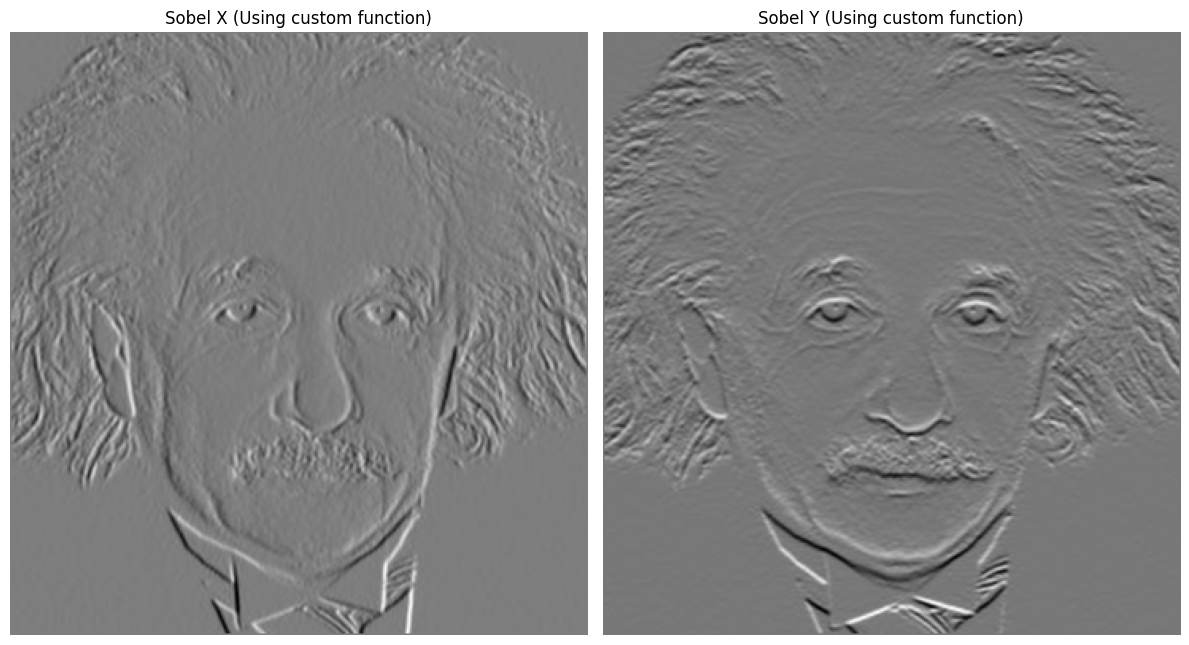

In [67]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [68]:
# Sobel x filter seperated
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter seperated
sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(einstein, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

y_mid = cv.filter2D(einstein, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

print(sobel_x_vertical @ sobel_x_horizontal)
print(sobel_y_vertical @ sobel_y_horizontal)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


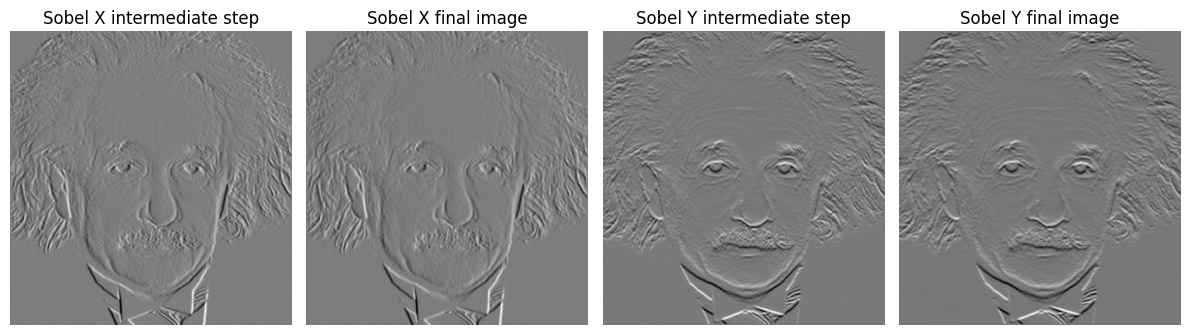

In [69]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate step')
ax[0].axis("off")
ax[1].imshow(x_filtered_image, cmap='gray')
ax[1].set_title('Sobel X final image')
ax[1].axis("off")
ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate step')
ax[2].axis("off")
ax[3].imshow(y_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y final image')
ax[3].axis("off")

plt.tight_layout()
plt.show()

## Question 8

In [70]:
def zoom(img, technique, scale=4):
    if technique == 'nn':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif technique == 'bilinear':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)

def norm_SSD(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions")
    return np.sum((img1 - img2)**2) / img1.size

### For image 1

In [71]:
# Import images
im1 = cv.imread('a1images/a1q5images/im01.png', cv.IMREAD_COLOR)
assert im1 is not None
im1_small = cv.imread('a1images/a1q5images/im01small.png')
assert im1_small is not None

In [72]:
im1_zoomed_nn = zoom(im1_small, technique='nn')
im1_zoomed_bilinear = zoom(im1_small, technique='bilinear')

nn_SSD = norm_SSD(im1, im1_zoomed_nn)
bilinear_SSD = norm_SSD(im1, im1_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

Normalized SSD for Nearest Neighbour:  31.284316486625514
Normalized SSD for Bilinear:  31.053094618055557


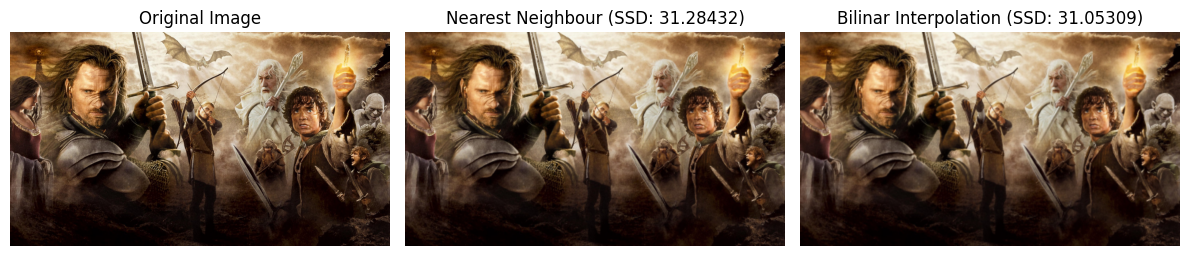

In [73]:
# Create a figure and axes
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot the original  image
axs[0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

# Plot the second image
axs[1].imshow(cv.cvtColor(im1_zoomed_nn, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})')
axs[1].axis('off')  # Turn off the axis

# Plot the third image
axs[2].imshow(cv.cvtColor(im1_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[2].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})')
axs[2].axis('off')  # Turn off the axis



# Show the plot
plt.tight_layout()
plt.show()

### For image 2

In [74]:
# Import images
im2 = cv.imread('a1images/a1q5images/im02.png')
assert im2 is not None
im2_small = cv.imread('a1images/a1q5images/im02small.png')
assert im2_small is not None

In [75]:
im2_zoomed_nn = zoom(im2_small, technique='nn')
im2_zoomed_bilinear = zoom(im2_small, technique='bilinear')

In [76]:
nn_SSD = norm_SSD(im2, im2_zoomed_nn)
bilinear_SSD = norm_SSD(im2, im2_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

Normalized SSD for Nearest Neighbour:  11.902013310185184
Normalized SSD for Bilinear:  10.682991753472223


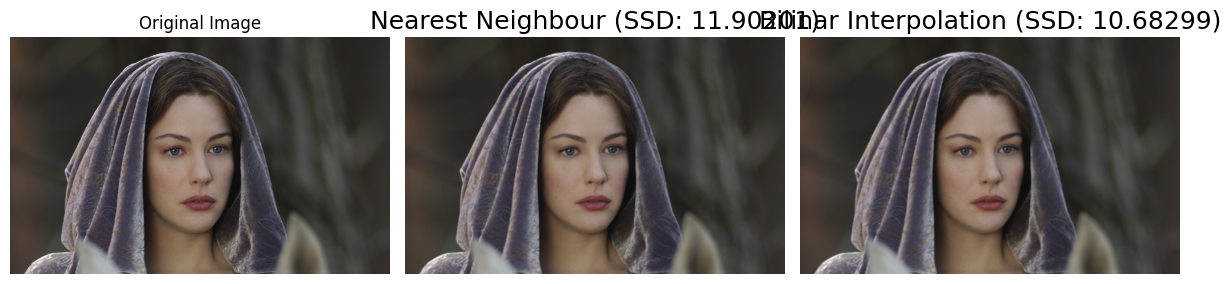

In [99]:
# Create a figure and axes
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Plot the original  image
axs[0].imshow(cv.cvtColor(im2, cv.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

# Plot the first image
axs[1].imshow(cv.cvtColor(im2_zoomed_nn, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=18)
axs[1].axis('off')  # Turn off the axis

# Plot the second image
axs[2].imshow(cv.cvtColor(im2_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[2].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=18)
axs[2].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

### For image 3

In [78]:
# Import images
im3 = cv.imread('a1images/a1q5images/im03.png')
assert im3 is not None
im3_small = cv.imread('a1images/a1q5images/im03small.png')
assert im3_small is not None

(1460, 2400, 3)
(1460, 2400, 3)
(1459, 2400, 3)


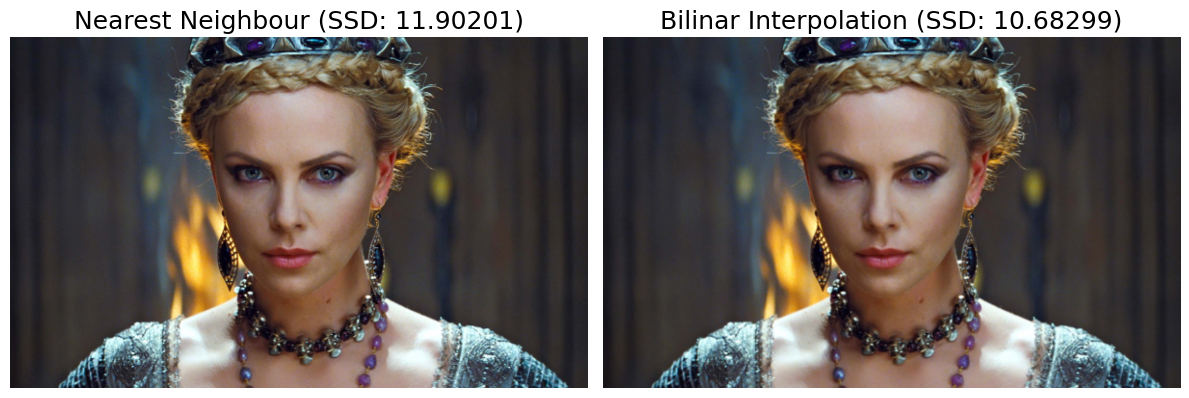

In [79]:
im3_zoomed_nn = zoom(im3_small, technique='nn')
im3_zoomed_bilinear = zoom(im3_small, technique='bilinear')
print(im3_zoomed_nn.shape)
print(im3_zoomed_bilinear.shape)
print(im3.shape)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
# Plot the second image
axs[0].imshow(cv.cvtColor(im3_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=18)
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(cv.cvtColor(im3_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=18)
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

Image 04

In [80]:
# Import images
im4 = cv.imread('a1images/a1q5images/taylor.jpg')
assert im4 is not None
im4_small = cv.imread('a1images/a1q5images/taylor_small.jpg')
assert im4_small is not None

(1460, 2400, 3)
(1460, 2400, 3)
(1459, 2400, 3)


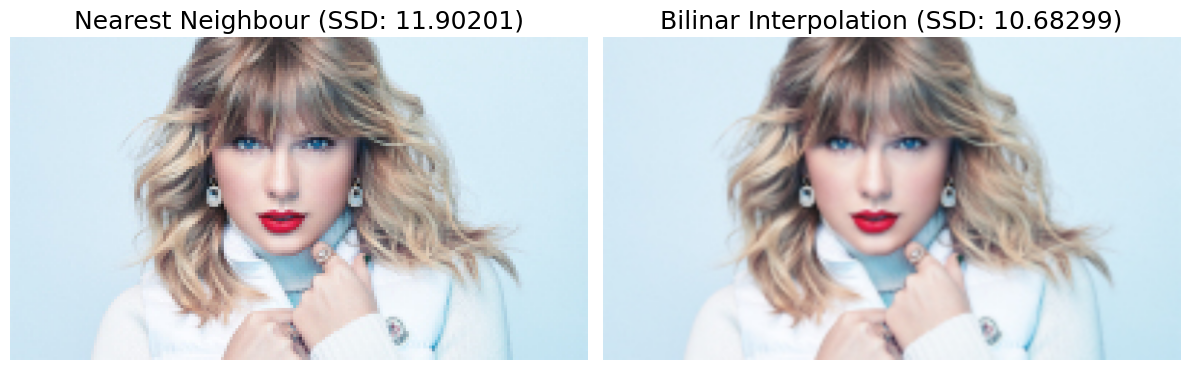

In [81]:
im4_zoomed_nn = zoom(im4_small, technique='nn')
im4_zoomed_bilinear = zoom(im4_small, technique='bilinear')
print(im3_zoomed_nn.shape)
print(im3_zoomed_bilinear.shape)
print(im3.shape)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
# Plot the second image
axs[0].imshow(cv.cvtColor(im4_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=18)
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(cv.cvtColor(im4_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinar Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=18)
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

## Question 9

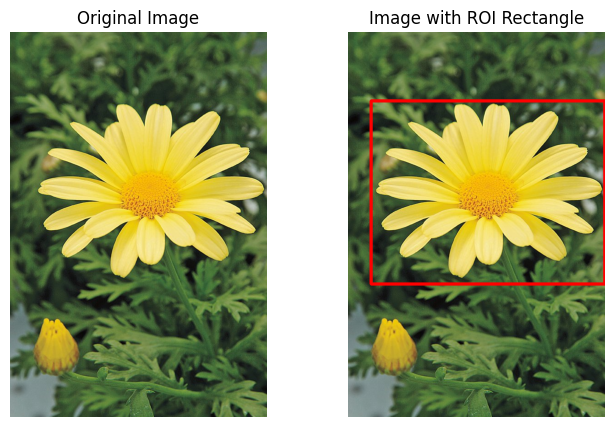

In [ ]:
img9 = cv.imread("a1images/daisy.jpg", cv.IMREAD_COLOR)

# Tuning rectangle position
img_with_rectangle = img9.copy()
cv.rectangle(img_with_rectangle, (50, 150), (560, 550), (0, 0, 255), 5)

plt.figure(figsize=(8, 5))

# Plotting image and image with ROI
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img9, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_with_rectangle, cv.COLOR_BGR2RGB))
plt.title("Image with ROI Rectangle")
plt.axis("off")

plt.show()

part (a)

In [ ]:
mask = np.zeros(img9.shape[:2], dtype=np.uint8)

backgroundModel = np.zeros((1, 65), dtype=np.float64)
foregroundModel = np.zeros((1, 65), dtype=np.float64)

rectangle = (50, 150, 510, 400)

In [ ]:
cv.grabCut(img9, mask, rectangle, backgroundModel, foregroundModel, 5, cv.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(841, 561), dtype=uint8),
 array([[ 3.56548445e-01,  3.41181780e-02,  3.02649539e-01,
          7.87431477e-02,  2.27940691e-01,  5.16067503e+01,
          9.50801071e+01,  6.47598098e+01,  4.53189224e+01,
          1.40887482e+02,  1.61619374e+02,  3.57790922e+01,
          5.36107131e+01,  3.90554747e+01,  1.03567764e+02,
          1.19004159e+02,  1.00605822e+02,  6.55277556e+01,
          1.29167657e+02,  9.96116987e+01,  2.67531609e+01,
          5.26921409e+01,  3.59569485e+01,  5.26921409e+01,
          1.54975715e+02,  8.90875855e+01,  3.59569485e+01,
          8.90875855e+01,  7.42022729e+01,  4.16917646e+02,
          3.94474832e+01, -5.03336833e+01,  3.94474832e+01,
          1.70724182e+03,  2.09834586e+03, -5.03336833e+01,
          2.09834586e+03,  2.7224443

In [ ]:
fg_mask = np.where((mask==2)|(mask==0), 0, 1).astype(np.uint8)
img9_fg = img9 * fg_mask[:,:,np.newaxis]

bg_mask = np.where((mask==1)|(mask==3), 0, 1).astype(np.uint8)
img9_bg = img9 * bg_mask[:,:,np.newaxis]

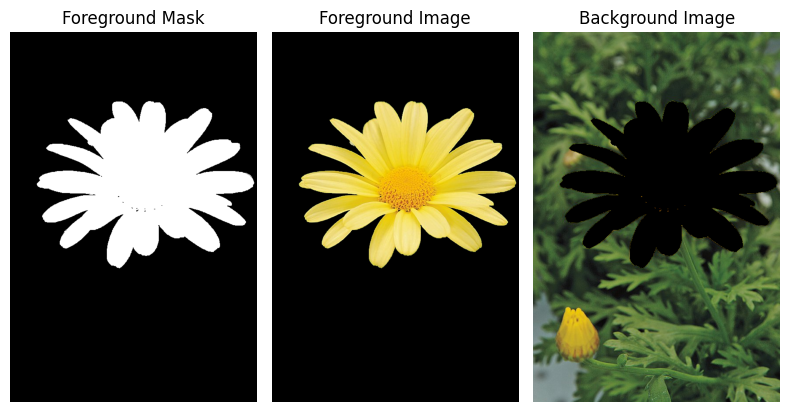

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8, 8))

ax[0].imshow(fg_mask, cmap='gray')
ax[0].set_title("Foreground Mask")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img9_fg, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(img9_bg, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()

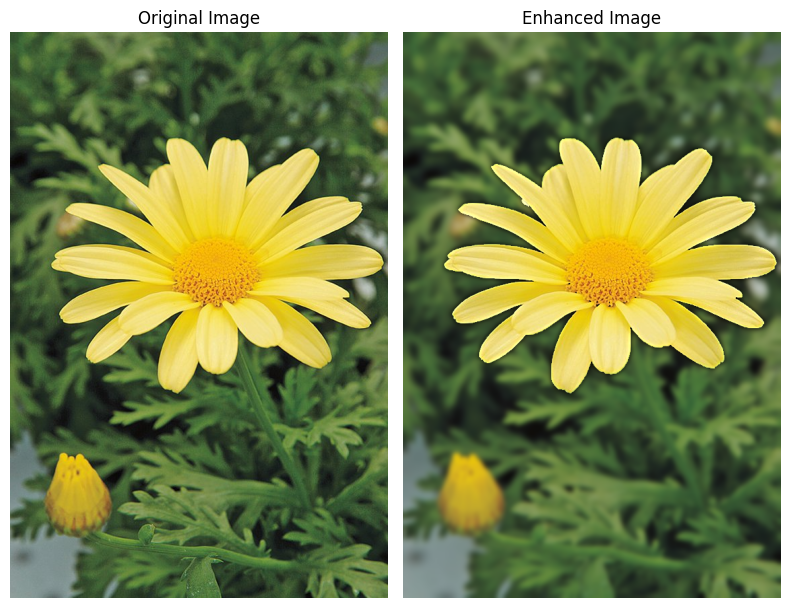

In [ ]:
img9_bg_blurred = cv.GaussianBlur(img9_bg,(21,21),0)

img9_enhanced = cv.add(img9_fg, img9_bg_blurred)

fig, ax = plt.subplots(1, 2, figsize=(8, 8))

ax[0].imshow(cv.cvtColor(img9, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img9_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.tight_layout()
plt.show()